In [267]:
from bs4 import BeautifulSoup
import requests
import time, os
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [177]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

chromedriver = "C:\ProgramData\Microsoft\Windows\Start Menu\Programs\chromedriver.exe" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

In [8]:
#http://saudisale.com/SS_e_car.aspx?carid=153631
page = requests.get('http://saudisale.com/SS_e_car.aspx?carid=153621').text
soup = BeautifulSoup(page, 'html5lib')

In [178]:
def get_cars(num_of_cars):
    url = 'http://saudisale.com/SS_e_car.aspx?carid='
    url_2 = []
    column_names = ["Car_Name", "Car_Make", "Color",'Year','Gear','Cylinder','Drive_Train','Inside_Color',\
                  'Inside_Type','Car_Model','Type_of_Fule','Dealership','Warranty','KM','Price']
    
    df_cars = pd.DataFrame(columns = column_names)
    page_start = 152621
    index = 0
    for i in range((num_of_cars)):
        url_2.append(str(i+page_start))
    for link in url_2:
        
        page = requests.get(url + link)
        soup = BeautifulSoup(page.text, 'html5lib')
        if soup.find( text = re.compile('Sorry but this car is no longer available')):
                     print(f'The link: {url + link} not found ')
        else:
            df_cars.loc[index] = [soup.find('span', id='d_carname').text, soup.find('span', id='d_classname').text,\
                             soup.find('span', id='d_outcolor').text, soup.find('span', id='d_year').text,\
                             soup.find('span', id='d_gear').text, soup.find('span', id='d_cylinder').text,\
                             soup.find('span', id='d_wheeldrive').text, soup.find('span', id='d_insidecolor').text,\
                             soup.find('span', id='d_insidetype').text,\soup.find('span', id='d_model').text,
                             soup.find('span', id='d_fuel').text, soup.find('span', id='d_source').text,\
                             soup.find('span', id='d_bank').text, soup.find('span', id='d_km').text,\
                             soup.find('span', id='d_price').text]
            print (f'The total load is {index} out of {len(num_of_cars)}')
            index += 1
    return df_cars

In [ ]:
   df_cars["Car_Make"] = soup.find('span', id='d_carname').text
        df_cars["Car_Model"] = soup.find('span', id='d_classname').text
        df_cars["Color"] = soup.find('span', id='d_outcolor').text
        df_cars["Year"] = soup.find('span', id='d_year').text
        df_cars["Gear"] = soup.find('span', id='d_gear').text
        df_cars["Cylinder"] = soup.find('span', id='d_cylinder').text
        df_cars["Drive_Train"] = soup.find('span', id='d_wheeldrive').text
        df_cars["Inside_Color"] = soup.find('span', id='d_insidecolor').text
        df_cars["Inside_Type"] = soup.find('span', id='d_insidetype').text
        df_cars["Type_of_Fule"] = soup.find('span', id='d_fuel').text
        df_cars["Dealership"] = soup.find('span', id='d_source').text
        df_cars["Warranty"] = soup.find('span', id='d_bank').text
        df_cars["KM"] = soup.find('span', id='d_km').text
        df_cars["Price"] = soup.find('span', id='d_price').text

In [180]:
my_df = get_cars(1000)

The link: http://saudisale.com/SS_e_car.aspx?carid=152658 not found 
The link: http://saudisale.com/SS_e_car.aspx?carid=152701 not found 
The link: http://saudisale.com/SS_e_car.aspx?carid=152732 not found 
The link: http://saudisale.com/SS_e_car.aspx?carid=152743 not found 
The link: http://saudisale.com/SS_e_car.aspx?carid=152764 not found 
The link: http://saudisale.com/SS_e_car.aspx?carid=152821 not found 
The link: http://saudisale.com/SS_e_car.aspx?carid=152867 not found 
The link: http://saudisale.com/SS_e_car.aspx?carid=152872 not found 
The link: http://saudisale.com/SS_e_car.aspx?carid=152873 not found 
The link: http://saudisale.com/SS_e_car.aspx?carid=152935 not found 
The link: http://saudisale.com/SS_e_car.aspx?carid=152940 not found 
The link: http://saudisale.com/SS_e_car.aspx?carid=152977 not found 
The link: http://saudisale.com/SS_e_car.aspx?carid=152980 not found 
The link: http://saudisale.com/SS_e_car.aspx?carid=153019 not found 
The link: http://saudisale.com/SS_

### EDA

In [218]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 966 entries, 0 to 965
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car_Make      966 non-null    object
 1   Car_Model     966 non-null    object
 2   Color         966 non-null    object
 3   Year          966 non-null    object
 4   Gear          966 non-null    object
 5   Cylinder      966 non-null    object
 6   Drive_Train   966 non-null    object
 7   Inside_Color  966 non-null    object
 8   Inside_Type   966 non-null    object
 9   Type_of_Fule  966 non-null    object
 10  Dealership    966 non-null    object
 11  Warranty      966 non-null    object
 12  KM            966 non-null    object
 13  Price         966 non-null    object
dtypes: object(14)
memory usage: 145.5+ KB


In [217]:
my_df.head()

,Car_Make,Car_Model,Color,Year,Gear,Cylinder,Drive_Train,Inside_Color,Inside_Type,Type_of_Fule,Dealership,Warranty,KM,Price
0,Land Rover,Defender,Black,2022,Automatic,6,4WD,Beige,Leather,Gasoline,Agency,YES,0,"450,000"
1,Mercedes-Benz,G,Black,2020,Automatic,8,4WD,Orange,Leather,Gasoline,Gulf,YES,58000,"900,000"
2,Jeep,Grand Cherokee,White,2021,Automatic,6,4WD,Dark Beige,Leather,Gasoline,Gulf,YES,0,"219,999"
3,Mercedes-Benz,GLE,White,2020,Automatic,6,4WD,Beige,Leather,Gasoline,Agency,YES,8000,"355,000"
4,Fiat,500,White,2020,Automatic,4,FWD,Black,Leather,Gasoline,Agency,YES,700,"75,000"


In [ ]:
#To remove 
my_df['KM'] = my_df['KM'].apply(lambda x: x.replace('Km', ''))
my_df['KM'] = my_df['KM'].apply(lambda x: x.replace(',', ''))
my_df['KM'] = my_df['KM'].apply(lambda x: x.replace(' ', ''))
# The use of 'coerce' is to force the funcation to operat tho 
my_df['KM'] = pd.to_numeric(my_df['KM'],errors='coerce')

In [250]:
type((my_df["KM"][233]))

numpy.float64

In [252]:
my_df.iloc[233]

Car_Make             GMC
Car_Model         Sierra
Color                Red
Year                1982
Gear              Manual
Cylinder               8
Drive_Train          4WD
Inside_Color       Beige
Inside_Type        Cloth
Type_of_Fule    Gasoline
Dealership        Agency
Warranty              NO
KM                   NaN
Price             42,000
Name: 233, dtype: object

In [255]:
# EDA For the Price column
my_df['Price'] = my_df['Price'].apply(lambda x: x.replace(',', ''))
my_df['Price'] = pd.to_numeric(my_df['Price'],errors='coerce')


In [256]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 966 entries, 0 to 965
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car_Make      966 non-null    object 
 1   Car_Model     966 non-null    object 
 2   Color         966 non-null    object 
 3   Year          966 non-null    object 
 4   Gear          966 non-null    object 
 5   Cylinder      966 non-null    object 
 6   Drive_Train   966 non-null    object 
 7   Inside_Color  966 non-null    object 
 8   Inside_Type   966 non-null    object 
 9   Type_of_Fule  966 non-null    object 
 10  Dealership    966 non-null    object 
 11  Warranty      966 non-null    object 
 12  KM            964 non-null    float64
 13  Price         920 non-null    float64
dtypes: float64(2), object(12)
memory usage: 145.5+ KB


In [257]:
#
my_df['Year'] = pd.to_numeric(my_df['Year'],errors='coerce')


In [258]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 966 entries, 0 to 965
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car_Make      966 non-null    object 
 1   Car_Model     966 non-null    object 
 2   Color         966 non-null    object 
 3   Year          966 non-null    int64  
 4   Gear          966 non-null    object 
 5   Cylinder      966 non-null    object 
 6   Drive_Train   966 non-null    object 
 7   Inside_Color  966 non-null    object 
 8   Inside_Type   966 non-null    object 
 9   Type_of_Fule  966 non-null    object 
 10  Dealership    966 non-null    object 
 11  Warranty      966 non-null    object 
 12  KM            964 non-null    float64
 13  Price         920 non-null    float64
dtypes: float64(2), int64(1), object(11)
memory usage: 145.5+ KB


In [260]:
my_df['Cylinder'] = pd.to_numeric(my_df['Cylinder'],errors='coerce')

In [ ]:
Drive_Train_dict = {
    '4WD':'',
    'FWD':'',
    'RWD':'',
    'AWD':'',
    'Undefined': Nan
}

In [ ]:
## 

In [263]:
my_df.dropna(inplace= True)

In [264]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 965
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car_Make      918 non-null    object 
 1   Car_Model     918 non-null    object 
 2   Color         918 non-null    object 
 3   Year          918 non-null    int64  
 4   Gear          918 non-null    object 
 5   Cylinder      918 non-null    int64  
 6   Drive_Train   918 non-null    object 
 7   Inside_Color  918 non-null    object 
 8   Inside_Type   918 non-null    object 
 9   Type_of_Fule  918 non-null    object 
 10  Dealership    918 non-null    object 
 11  Warranty      918 non-null    object 
 12  KM            918 non-null    float64
 13  Price         918 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 107.6+ KB


In [265]:
my_df.describe()

,Year,Cylinder,KM,Price
count,918.000000,918.000000,918.000000,9.180000e+02
mean,2018.314815,6.516340,41059.557734,3.658652e+05
std,3.499808,2.118428,49428.017282,3.161196e+05
min,1979.000000,0.000000,0.000000,2.500000e+04
25%,2016.000000,4.000000,0.000000,1.650000e+05
50%,2019.000000,6.000000,23950.000000,2.725000e+05
75%,2021.000000,8.000000,68000.000000,4.350000e+05
max,2022.000000,12.000000,299000.000000,2.350000e+06


In [266]:
my_df.corr()

,Year,Cylinder,KM,Price
Year,1.000000,-0.319357,-0.632546,0.250863
Cylinder,-0.319357,1.000000,0.148578,0.509801
KM,-0.632546,0.148578,1.000000,-0.337273
Price,0.250863,0.509801,-0.337273,1.000000


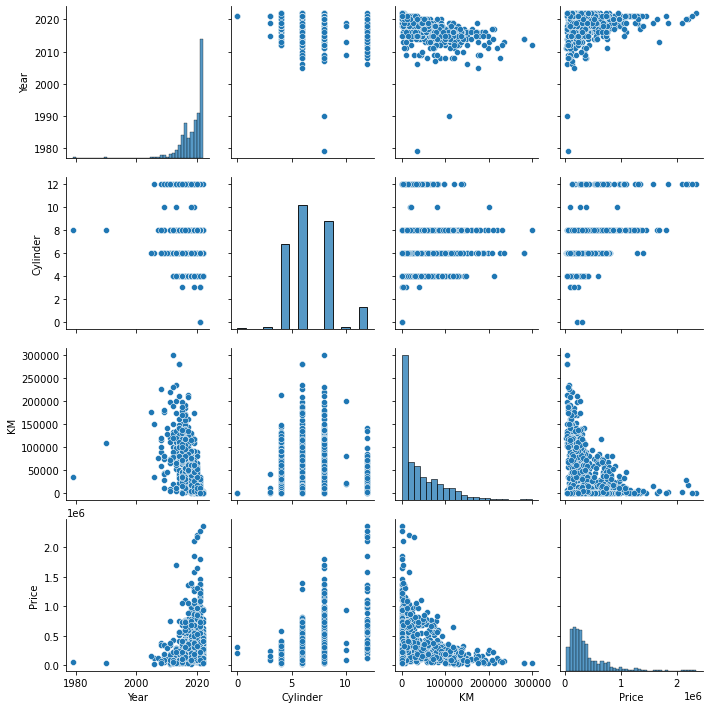

In [268]:
sns.pairplot(my_df)

In [270]:
my_df['Drive_Train'].value_counts()

4WD          475
RWD          278
FWD           91
AWD           70
Undefined      4
Name: Drive_Train, dtype: int64

In [273]:
pd.get_dummies(my_df['Drive_Train'])

,4WD,AWD,FWD,RWD,Undefined
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
961,0,0,1,0,0
962,0,0,0,1,0
963,0,0,1,0,0
964,1,0,0,0,0


In [274]:
my_df

,Car_Make,Car_Model,Color,Year,Gear,Cylinder,Drive_Train,Inside_Color,Inside_Type,Type_of_Fule,Dealership,Warranty,KM,Price
0,Land Rover,Defender,Black,2022,Automatic,6,4WD,Beige,Leather,Gasoline,Agency,YES,0.0,450000.0
1,Mercedes-Benz,G,Black,2020,Automatic,8,4WD,Orange,Leather,Gasoline,Gulf,YES,58000.0,900000.0
2,Jeep,Grand Cherokee,White,2021,Automatic,6,4WD,Dark Beige,Leather,Gasoline,Gulf,YES,0.0,219999.0
3,Mercedes-Benz,GLE,White,2020,Automatic,6,4WD,Beige,Leather,Gasoline,Agency,YES,8000.0,355000.0
4,Fiat,500,White,2020,Automatic,4,FWD,Black,Leather,Gasoline,Agency,YES,700.0,75000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,Chevrolet,Impala,Silver,2015,Automatic,6,FWD,Espresso,Leather,Gasoline,America,YES,72000.0,106000.0
962,Mercedes-Benz,E,Silver,2019,Automatic,4,RWD,Dark Beige,Leather,Gasoline,America,YES,61000.0,196000.0
963,Ford,Taurus,Gold,2018,Automatic,6,FWD,Dark Beige,Leather,Gasoline,America,YES,114000.0,89000.0
964,Lexus,LX,White,2016,Automatic,8,4WD,Beige,Leather,Gasoline,Agency,NO,117000.0,305000.0


In [277]:
my_df_withdummy = pd.get_dummies(my_df, drop_first=True) #can just apply it to the whole df


In [278]:
my_df_withdummy.head()

,Year,Cylinder,KM,Price,Car_Make_Audi,Car_Make_BMW,Car_Make_Baic,Car_Make_Bentley,Car_Make_Cadillac,Car_Make_Changan,...,Inside_Color_White & Dark Blue,Inside_Type_Leather,Inside_Type_Leather/Chamois,Inside_Type_Leather/Cloth,Type_of_Fule_Gasoline,Type_of_Fule_Hybrid,Dealership_America,Dealership_Gulf,Dealership_Undefined,Warranty_YES
0,2022,6,0.0,450000.0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,2020,8,58000.0,900000.0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
2,2021,6,0.0,219999.0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
3,2020,6,8000.0,355000.0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,2020,4,700.0,75000.0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [279]:
my_df_withdummy.corr()

,Year,Cylinder,KM,Price,Car_Make_Audi,Car_Make_BMW,Car_Make_Baic,Car_Make_Bentley,Car_Make_Cadillac,Car_Make_Changan,...,Inside_Color_White & Dark Blue,Inside_Type_Leather,Inside_Type_Leather/Chamois,Inside_Type_Leather/Cloth,Type_of_Fule_Gasoline,Type_of_Fule_Hybrid,Dealership_America,Dealership_Gulf,Dealership_Undefined,Warranty_YES
Year,1.000000,-0.319357,-0.632546,0.250863,-0.082947,0.002540,0.060326,-0.104094,-0.009607,0.131109,...,0.015832,-0.008650,-0.003577,0.006469,0.030488,-0.031294,-0.255283,0.211904,0.070747,0.681135
Cylinder,-0.319357,1.000000,0.148578,0.509801,-0.041635,-0.156792,-0.068052,0.283513,0.038287,-0.147901,...,0.010674,0.140943,0.011635,-0.008053,0.058090,-0.008053,-0.024182,-0.006253,0.049625,-0.240113
KM,-0.632546,0.148578,1.000000,-0.337273,0.035390,0.046467,-0.047591,0.008866,0.000604,-0.103433,...,0.003491,-0.027948,-0.022296,-0.025361,0.010360,-0.004051,0.142855,-0.199071,-0.058333,-0.601321
Price,0.250863,0.509801,-0.337273,1.000000,-0.096362,-0.122942,-0.043777,0.105980,-0.039542,-0.110283,...,0.014662,0.243037,-0.007037,0.033356,0.026581,-0.017859,-0.089734,0.154499,0.179792,0.272279
Car_Make_Audi,-0.082947,-0.041635,0.035390,-0.096362,1.000000,-0.060694,-0.009776,-0.027369,-0.022738,-0.021246,...,-0.007978,0.063318,-0.021246,-0.005638,0.013848,-0.005638,-0.029720,-0.038472,-0.043516,-0.063253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Type_of_Fule_Hybrid,-0.031294,-0.008053,-0.004051,-0.017859,-0.005638,-0.011740,-0.001891,-0.005294,-0.004398,-0.004110,...,-0.001543,0.012247,-0.004110,-0.001091,-0.407134,1.000000,-0.005749,-0.019149,0.129561,-0.043976
Dealership_America,-0.255283,-0.024182,0.142855,-0.089734,-0.029720,-0.061885,-0.009968,0.013346,-0.023185,-0.021663,...,0.130146,0.005235,0.030947,-0.005749,-0.065891,-0.005749,1.000000,-0.100942,-0.044369,-0.137827
Dealership_Gulf,0.211904,-0.006253,-0.199071,0.154499,-0.038472,0.000650,-0.033203,-0.060834,-0.038866,-0.072162,...,-0.027095,-0.046725,0.050741,0.056949,0.015881,-0.019149,-0.100942,1.000000,-0.147798,0.184496
Dealership_Undefined,0.070747,0.049625,-0.058333,0.179792,-0.043516,-0.061769,-0.014595,0.017384,-0.033947,-0.031719,...,-0.011910,0.094529,-0.031719,-0.008417,-0.035810,0.129561,-0.044369,-0.147798,1.000000,0.039733


In [ ]:
sns.pairplot(my_df_withdummy[:100])